# Аналіз датасету для рекомендаційної системи

**Датасет**: 5 CSV файлів з транзакційними даними роздрібної торгівлі

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load datasets
data_path = '../data/datasets/'
sales = pd.read_csv(data_path + 'g_fact_sales.csv')
customers = pd.read_csv(data_path + 'g_dim_customers.csv')
products = pd.read_csv(data_path + 'g_dim_products.csv')
customer_report = pd.read_csv(data_path + 'Customer_report_cleaned_data.csv')
product_report = pd.read_csv(data_path + 'Product_report_cleaned_data.csv')

print("✅ Дані завантажено успішно")

✅ Дані завантажено успішно


## 1. Загальна характеристика датасету

In [4]:
# Dataset overview
datasets_info = {
    'Продажі': sales.shape,
    'Клієнти': customers.shape,
    'Товари': products.shape,
    'Звіт по клієнтах': customer_report.shape,
    'Звіт по товарах': product_report.shape
}

print("СТРУКТУРА ДАТАСЕТУ")
print("=" * 40)
for name, shape in datasets_info.items():
    print(f"{name:<25}: {shape[0]:>6,} rows × {shape[1]:>2} cols")



СТРУКТУРА ДАТАСЕТУ
Продажі                  : 60,398 rows ×  9 cols
Клієнти                  : 18,484 rows × 10 cols
Товари                   :    569 rows × 11 cols
Звіт по клієнтах         : 18,482 rows × 14 cols
Звіт по товарах          :    130 rows × 16 cols


## 2. Ключові метрики для рекомендаційної системи

In [10]:
# Core metrics for recommendation system
n_users = sales['customer_key'].nunique()
n_items = sales['product_key'].nunique()
n_transactions = len(sales)
possible_interactions = n_users * n_items
density = n_transactions / possible_interactions
sparsity = 1 - density

print("МЕТРИКИ ДЛЯ РЕКОМЕНДАЦІЙНОЇ СИСТЕМИ")
print("=" * 45)
print(f"Унікальних користувачів: {n_users:,}")
print(f"Унікальних товарів: {n_items:,}")
print(f"Всього транзакцій: {n_transactions:,}")
print(f"Щільність матриці: {density:.6f} ({density*100:.2f}%)")
print(f"Розрідженість матриці: {sparsity:.6f} ({sparsity*100:.2f}%)")

if 'sales' in sales.columns:
    print(f"Загальна сума продажів: ${sales['sales'].sum():,.2f}")
    print(f"Середній чек: ${sales['sales'].mean():.2f}")

МЕТРИКИ ДЛЯ РЕКОМЕНДАЦІЙНОЇ СИСТЕМИ
Унікальних користувачів: 18,484
Унікальних товарів: 130
Всього транзакцій: 60,398
Щільність матриці: 0.025135 (2.51%)
Розрідженість матриці: 0.974865 (97.49%)
Загальна сума продажів: $29,355,985.00
Середній чек: $486.04


## 3. Аналіз активності користувачів та популярності товарів

In [6]:
# User activity and item popularity analysis
user_activity = sales.groupby('customer_key').size()
item_popularity = sales.groupby('product_key').size()

n_users = len(user_activity)
n_items = len(item_popularity)

# Пороги для аналізу
thresholds = [3, 4, 5]

print("АНАЛІЗ АКТИВНОСТІ")
print("=" * 50)

# Користувачі
print("КОРИСТУВАЧІ:")
for threshold in thresholds:
    cold_users = (user_activity < threshold).sum()
    active_users = (user_activity >= threshold).sum()
    print(f"   < {threshold} покупок: {cold_users:,} ({cold_users/n_users*100:.1f}%) | >= {threshold}: {active_users:,} ({active_users/n_users*100:.1f}%)")

# Товари
cold_items = (item_popularity < 5).sum()
active_items = (item_popularity >= 5).sum()
print(f"\nТОВАРИ:")
print(f"   < 5 покупок: {cold_items:,} ({cold_items/n_items*100:.1f}%) | >= 5: {active_items:,} ({active_items/n_items*100:.1f}%)")

# Середні значення
print(f"\nСЕРЕДНІ ПОКАЗНИКИ:")
print(f"   Користувач: {user_activity.mean():.2f} покупок")
print(f"   Товар: {item_popularity.mean():.2f} покупок")

АНАЛІЗ АКТИВНОСТІ
КОРИСТУВАЧІ:
   < 3 покупок: 7,600 (41.1%) | >= 3: 10,884 (58.9%)
   < 4 покупок: 12,222 (66.1%) | >= 4: 6,262 (33.9%)
   < 5 покупок: 15,074 (81.6%) | >= 5: 3,410 (18.4%)

ТОВАРИ:
   < 5 покупок: 0 (0.0%) | >= 5: 130 (100.0%)

СЕРЕДНІ ПОКАЗНИКИ:
   Користувач: 3.27 покупок
   Товар: 464.60 покупок


## 4. Сегментація клієнтів

In [7]:
# Customer segmentation analysis
if 'cust_segmentation' in customer_report.columns:
    segments = customer_report['cust_segmentation'].value_counts()
    print("СЕГМЕНТАЦІЯ КЛІЄНТІВ")
    print("=" * 30)
    for segment, count in segments.items():
        print(f"{segment}: {count:,} ({count/len(customer_report)*100:.2f}%)")

if 'age_group' in customer_report.columns:
    age_groups = customer_report['age_group'].value_counts()
    print("\nВІКОВІ ГРУПИ")
    print("=" * 20)
    for age, count in age_groups.items():
        print(f"{age}: {count:,} ({count/len(customer_report)*100:.2f}%)")

СЕГМЕНТАЦІЯ КЛІЄНТІВ
New: 14,826 (80.22%)
Regular: 2,039 (11.03%)
VIP: 1,617 (8.75%)

ВІКОВІ ГРУПИ
40-49: 6,282 (33.99%)
60 & Above: 6,177 (33.42%)
50-59: 5,585 (30.22%)
30-39: 438 (2.37%)


## 5. Візуалізація ключових характеристик

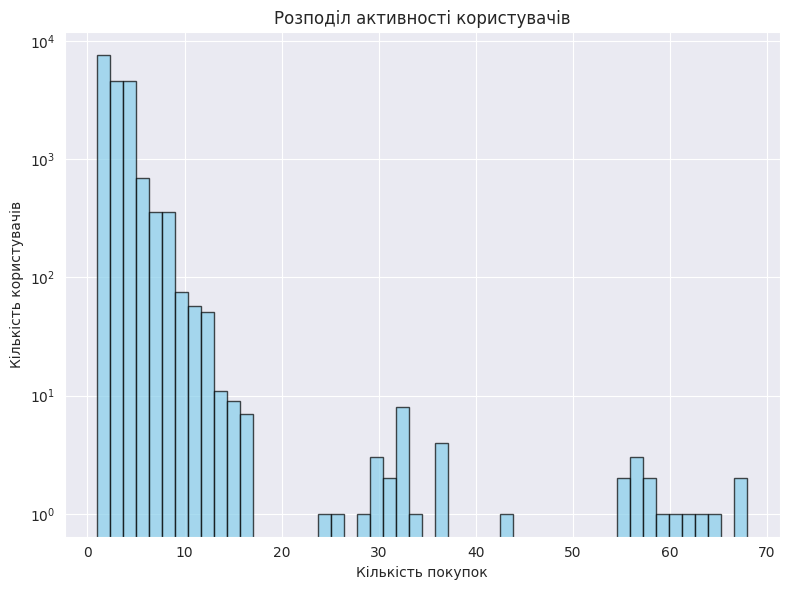

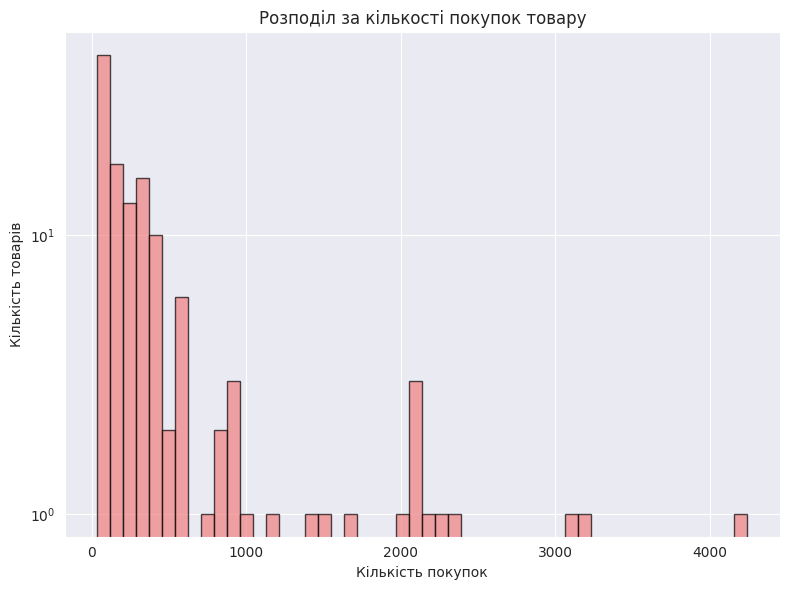

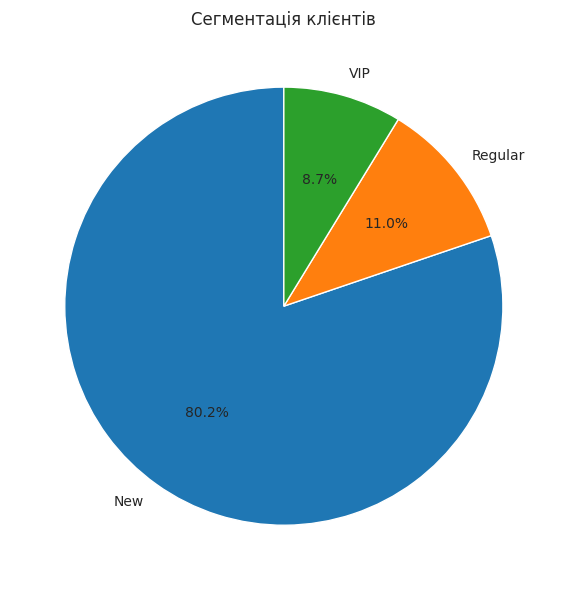

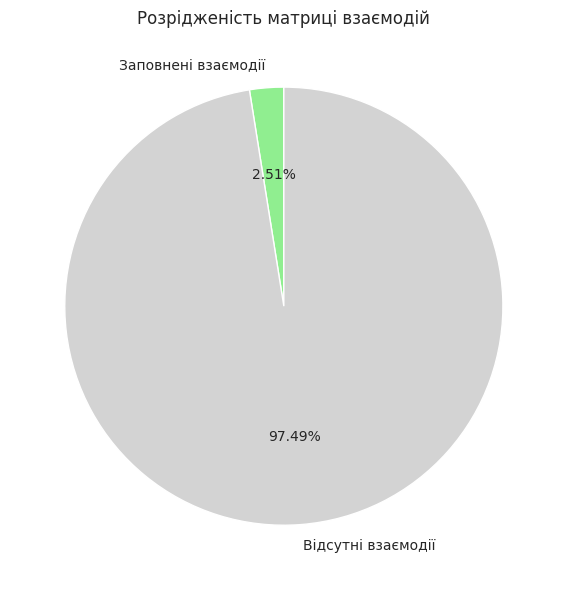

In [11]:
# Visualizations
plt.rcParams['font.size'] = 10

# 1. User activity distribution
plt.figure(figsize=(8, 6))
plt.hist(user_activity, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Розподіл активності користувачів')
plt.xlabel('Кількість покупок')
plt.ylabel('Кількість користувачів')
plt.yscale('log')
plt.tight_layout()
plt.show()

# 2. Item popularity distribution
plt.figure(figsize=(8, 6))
plt.hist(item_popularity, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Розподіл за кількості покупок товару')
plt.xlabel('Кількість покупок')
plt.ylabel('Кількість товарів')
plt.yscale('log')
plt.tight_layout()
plt.show()

# 3. Customer segmentation pie chart
plt.figure(figsize=(8, 6))
if 'cust_segmentation' in customer_report.columns:
    segments.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Сегментація клієнтів')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. Matrix sparsity visualization
plt.figure(figsize=(8, 6))
sparsity_data = [density*100, sparsity*100]
labels = ['Заповнені взаємодії', 'Відсутні взаємодії']
colors = ['lightgreen', 'lightgray']
plt.pie(sparsity_data, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Розрідженість матриці взаємодій')
plt.tight_layout()
plt.show()